<a href="https://colab.research.google.com/github/hannahrfong/CSC713M/blob/main/Investigatory_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC713M Investigatory Project**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as sps

In [2]:
fie_df = pd.read_csv('https://raw.githubusercontent.com/hannahrfong/CSC713M/main/fie.csv')

# Dataset Description

## Brief Description

The Family Income and Expenditure (FIE) dataset is derived from the 2015 Family Income and Expenditure Survey (FIES) conducted by the Philippine Statistics Authority (PSA). The dataset provides data on the income and expenditure of Filipino households which can be used to formulate governmental policies and programs to elevate the socio-economic conditions of Filipinos.

## Dataset File Structure

The dataset contains 41,544 samples and 60 features. Each sample represents one Filipino household.

In [3]:
fie_df.shape

(41544, 60)

The list of features in the dataset and their corresponding data types can be generated by running the code below.

In [4]:
fie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

# Data Cleaning

The FIE dataset will undergo data cleaning to identify noisy, incomplete, and inconsistent data that can degrade the performance of machine learning models to be used with the dataset.

Specifically, the following aspects of the dataset will be checked:

*   Multiple Representations
*   Incorrect Datatypes
*   Default Values
*   Missing Data
*   Duplicate Data
*   Inconsistent Format









## Multiple Representations

The `unique` function is used to check if there exist different representations in the categorical features of the dataset.

In [5]:
for column in fie_df.select_dtypes(include="object"):
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Household Head Sex' unique values:
 ['Female' 'Male']

'Household Head Marital Status' unique values:
 ['Single' 'Married' 'Widowed' 'Divorced/Separated' 'Annulled' 'Unknown']

'Household Head Highest Grade Completed' unique values:
 ['Teacher Training and Education Sciences Programs'
 'Transport Services Programs' 'Grade 3' 'Elementary Graduate'
 'Second Year High School' 'Third Year High School'
 'Business and Administration Programs' 'First Year College'
 'High School Graduate'
 'Other Programs in Education at the Third Level, Firs

Upon inspection, it can be confirmed that there are no multiple representations in the dataset.

## Incorrect Datatype

The `info` function is used to validate the data types of the values in the dataset.

In [6]:
fie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

Given that the categorical features are an object type and the numerical features have an integer (`int64`) type, no incorrect datatypes were found amongst all the features.

## Default Values

The `unique` function is used to identify default values in the dataset and to assess if these are appropriate in the context of the project.

In [7]:
for column in fie_df:
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Total Household Income' unique values:
 [480332 198235  82785 ... 133171 129500 128598]

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Total Food Expenditure' unique values:
 [117848  67766  61609 ...  31157  81416  78195]

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Agricultural Household indicator' unique values:
 [0 1 2]

'Bread and Cereals Expenditure' unique values:
 [42140 17329 34182 ... 19693 28563  2691]

'Total Rice Expenditure' unique values:
 [38300 13008 32001 ... 15918 23457  1273]

'Meat Expenditure' unique values:
 [24676 17434  7783 ...  6905  3181  2359]

'Total Fish and  marine products Expenditure' un

The result shows that the `Agricultural Household indicator` feature has 3 unique values (i.e. `0`, `1`, `2`). However, the metadata of the dataset specifies that there are only 2 possible values for this feature:
*   1 - Agricultural Household
*   2 - Non-agricultural Household


In [8]:
fie_df.loc[fie_df['Agricultural Household indicator'] == 0].shape

(28106, 60)

There are 28,106 observations with the undefined `0` value for the `Agricultural Household indicator` feature, which is more than half (67.65%) of the dataset. Therefore, these observations cannot just be deleted.

Instead, the `Agricultural Household indicator` feature will be removed to handle the ambiguous data and prevent it from impairing the performance of the machine learning models to be used.

**!!! TODO: Can get correct value from raw dataset**

In [9]:
fie_df = fie_df.drop(['Agricultural Household indicator'], axis=1)
fie_df.shape

(41544, 59)

## Missing Data

The `isnull` and `any` functions are used to check for missing values in the dataset.

In [10]:
fie_df.isnull().any()

Total Household Income                           False
Region                                           False
Total Food Expenditure                           False
Main Source of Income                            False
Bread and Cereals Expenditure                    False
Total Rice Expenditure                           False
Meat Expenditure                                 False
Total Fish and  marine products Expenditure      False
Fruit Expenditure                                False
Vegetables Expenditure                           False
Restaurant and hotels Expenditure                False
Alcoholic Beverages Expenditure                  False
Tobacco Expenditure                              False
Clothing, Footwear and Other Wear Expenditure    False
Housing and water Expenditure                    False
Imputed House Rental Value                       False
Medical Care Expenditure                         False
Transportation Expenditure                       False
Communicat

In [11]:
nan_variables = fie_df.columns[fie_df.isnull().any()].tolist()
print(nan_variables)

['Household Head Occupation', 'Household Head Class of Worker', 'Toilet Facilities']


In [12]:
fie_df[nan_variables].isnull().sum()

Household Head Occupation         7536
Household Head Class of Worker    7536
Toilet Facilities                 1580
dtype: int64

There are 2 features with missing values:

1. Household Head Occupation
2. Household Head Class of Worker

Let us check if these null values are missing at random or not by counterchecking with the `Household Head Job or Business Indicator` feature that indicates whether a household head is employed or not.



In [13]:
job_variables = nan_variables
job_variables.append('Household Head Job or Business Indicator')

fie_df[job_variables].loc[(fie_df['Household Head Occupation'].isnull()) & (fie_df['Household Head Class of Worker'].isnull()) & (fie_df['Household Head Job or Business Indicator'] == 'No Job/Business')]

,Household Head Occupation,Household Head Class of Worker,Toilet Facilities,Household Head Job or Business Indicator
8,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
13,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
14,NaN,NaN,Closed pit,No Job/Business
15,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
26,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
...,...,...,...,...
41520,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
41529,NaN,NaN,"Water-sealed, sewer septic tank, shared with o...",No Job/Business
41533,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business
41535,NaN,NaN,"Water-sealed, sewer septic tank, used exclusiv...",No Job/Business


The executed code above returns observations that have a `NaN` value for `Household Head Occupation`, a `Nan` value for `Household Head of Class of Worker`, and a `No Job/Business` value for `Household Head Job or Business Indicator`. The result contains 7,536 observations which is the same number of observations that have null values for the 2 `nan_variables` (i.e. `Household Head Occupation` and `Household Head of Class of Worker`).

Based on this, it can be deduced that the missing values are not missing at random. Instead, they indicate the unemployment of household heads.

The null values will be handled by replacing them with an `Unemployed` value to properly label the data.

In [14]:
fie_df = fie_df.fillna('Unemployed')
nan_variables = fie_df.columns[fie_df.isnull().any()].tolist()
print(nan_variables)

[]


After running the code above, there are no more missing values in the dataset.

## Duplicate Data

The `drop_duplicates` function is used to delete duplicate data in the dataset.

In [15]:
fie_df.drop_duplicates()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,42140,38300,24676,16806,3325,13460,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,17329,13008,17434,11073,2035,7833,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,34182,32001,7783,2590,1730,3795,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,34030,28659,10914,10812,690,7887,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,34820,30167,18391,11309,1395,11260,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,23675,21542,1476,6120,1632,3882,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,2691,1273,1886,4386,1840,3110,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,28646,27339,480,4796,1232,3025,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,29996,26655,2359,17730,2923,7951,...,0,0,0,0,0,2,0,0,0,0


There are 41,544 observations returned after running the `drop_duplicates` function, which is the same as the number of observations in the original dataset. Therefore, there are no duplicates in the dataset.

## Inconsistent Format

The Philippine regions have an inconsistent format, particularly for regions IX – Zamboanga Peninsula, XIII – Caraga, and ARMM. Region IX contains an misspelling of the region, Region XIII does not have its roman numeral as part of its label, and ARMM contains a whitespace character before the abbreviation.

In [16]:
for column in fie_df:
    print("'{}' unique values:\n".format(column), fie_df[column].unique())
    print("")

'Total Household Income' unique values:
 [480332 198235  82785 ... 133171 129500 128598]

'Region' unique values:
 ['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

'Total Food Expenditure' unique values:
 [117848  67766  61609 ...  31157  81416  78195]

'Main Source of Income' unique values:
 ['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

'Bread and Cereals Expenditure' unique values:
 [42140 17329 34182 ... 19693 28563  2691]

'Total Rice Expenditure' unique values:
 [38300 13008 32001 ... 15918 23457  1273]

'Meat Expenditure' unique values:
 [24676 17434  7783 ...  6905  3181  2359]

'Total Fish and  marine products Expenditure' unique values:
 [16806 11073  2590 ... 10623 12496 17730]

'Fr

In [17]:
regions = {
    'IX - Zasmboanga Peninsula': 'IX - Zamboanga Peninsula',
    ' ARMM': 'ARMM',
    'Caraga': 'XIII - Caraga'
}

fie_df['Region'] = fie_df['Region'].map(regions).fillna(fie_df['Region'])

With this, we map these errors to the correct labels by using the `map()` function and the `regions` dictionary.

The `Type of Walls` feature has a subset of samples that contain a `NOt applicable` value. To make this consistent with other columns that have a `Not Applicable` value, we replace all current instances with the new value.

In [18]:
fie_df['Type of Walls'] = fie_df['Type of Walls'].replace('NOt applicable', 'Not Applicable')

The `Total Income from Entrepreneurial Acitivites` feature misspells the word *Activities*.

In [19]:
fie_df.rename(columns={'Total Income from Entrepreneurial Acitivites': 'Total Income from Entrepreneurial Activites'})

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,42140,38300,24676,16806,3325,13460,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,17329,13008,17434,11073,2035,7833,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,34182,32001,7783,2590,1730,3795,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,34030,28659,10914,10812,690,7887,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,34820,30167,18391,11309,1395,11260,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,23675,21542,1476,6120,1632,3882,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,2691,1273,1886,4386,1840,3110,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,28646,27339,480,4796,1232,3025,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,29996,26655,2359,17730,2923,7951,...,0,0,0,0,0,2,0,0,0,0


# Data Preprocessing

## Binning

### Total Household Income

The observations will be binned into the different income classes as defined by the Philippine Statistics Authority (TODO: Insert citation). The binning will be based on the monthly household income, which is obtained by dividing the `Total Household Income` by 6 since it reflects the total household income from January to June 2015 (Philippine statistics Authority, 2017).  

In [20]:
monthly_income = fie_df['Total Household Income'] / 6
bins = [0, 10957, 21914, 43828, 76669, 131484, 219140, monthly_income.max() + 1]
labels = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
fie_df['Income Class'] = pd.cut(monthly_income, bins=bins, labels=labels, right=False)
fie_df['Income Class'] = fie_df['Income Class'].astype('object')
fie_df['Income Class'] 

0        Upper middle
1        Lower middle
2          Low-income
3          Low-income
4        Lower middle
             ...     
41539      Low-income
41540    Lower middle
41541    Lower middle
41542      Low-income
41543      Low-income
Name: Income Class, Length: 41544, dtype: object

### Household Head Highest Grade Completed

Based on the “Household Head Highest Grade Completed”, there are multiple labels that dictate a specific educational attainment that a person has completed. To simplify the labels, we bin these values into five categories: `No Grade Completed`, `Preschool`, `Primary Level`, `Secondary Level`, and `Tertiary Level`.

In [21]:
grade = {
    'Preschool': 'Preschool',
    'No Grade Completed': 'No Grade Completed',
    'Grade 1': 'Primary Level',
    'Grade 2': 'Primary Level',
    'Grade 3': 'Primary Level',
    'Grade 4': 'Primary Level',
    'Grade 5': 'Primary Level',
    'Grade 6': 'Primary Level',
    'Elementary Graduate': 'Primary Level',
    'First Year High School': 'Secondary Level',
    'Second Year High School': 'Secondary Level',
    'Third Year High School': 'Secondary Level',
    'High School Graduate': 'Secondary Level',
    'Post Baccalaureate': 'Post Baccalaureate'
}

fie_df['Household Head Highest Grade Completed'] = fie_df['Household Head Highest Grade Completed'].map(grade)
fie_df['Household Head Highest Grade Completed'] = fie_df['Household Head Highest Grade Completed'].replace(np.nan, 'Tertiary Level')

# Exploratory Data Analysis

The attributes of the FIES dataset can be generally classified into 3 categories: demographics, socio-economic featueres, and expenditures. 

In line with these types of data, the researchers formulated the following EDA questions:

1. How is the dataset distributed based on demographics?
2. What are the characteristics of the different income classes?
3. How does expenditure differ across the different income classes?

## EDA Question #1

The first EDA question aims to determine how the data is distributed based on demographics.

Specifically, we aim to answer the following specific questions:
1. How many observations are there per region?
2. What is the distribution of the age of household heads?
3. What is the ratio of male to female household heads?
4. What is the ratio of male to female per class of worker? 
5. What is the average total household income per region?
6. What is the employment rate of household heads per region? // is it better to compare between regions?

### 1. Number of Observations Per Region

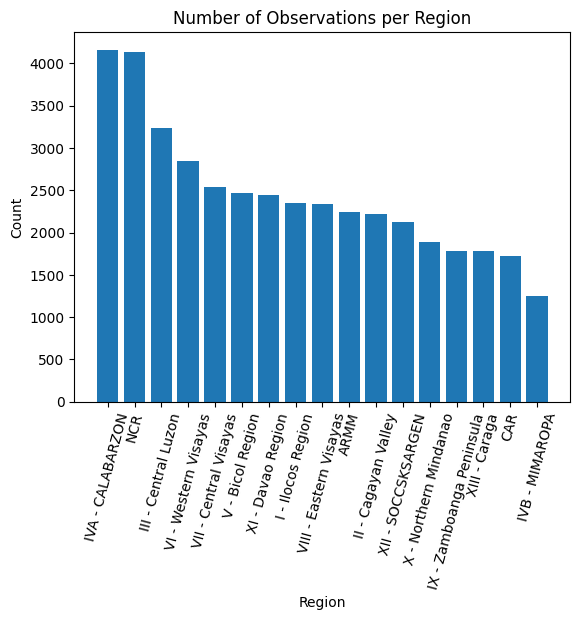

In [22]:
region_counts = fie_df['Region'].value_counts()

plt.bar(region_counts.index, region_counts.values)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Observations per Region')

plt.xticks(rotation=75)
plt.show()

### 2. Distribution of Household Head Age

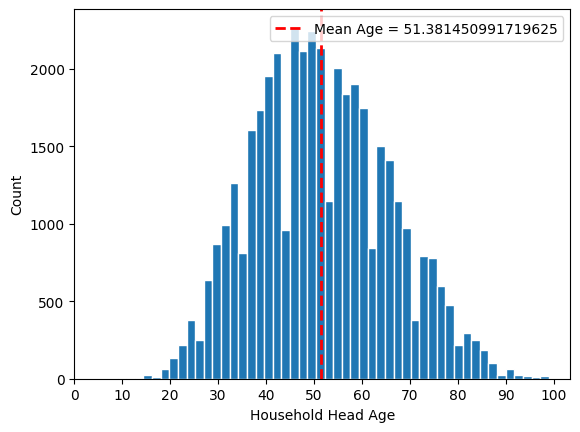

In [23]:
data = fie_df['Household Head Age']
mean_age = data.mean()

plt.hist(data, bins=50, edgecolor='w')

x_axis_labels = range(0, 101, 10)
plt.xticks(x_axis_labels)
plt.xlabel('Household Head Age')
plt.ylabel('Count')

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age = {mean_age}')

plt.legend()
plt.show()

### 3. Ratio of Male to Female Household Heads

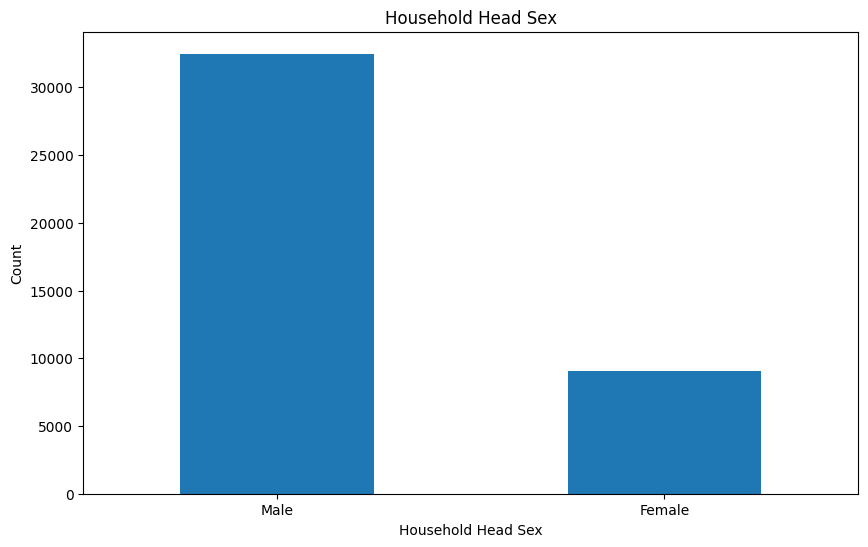

In [24]:
hhs_counts = fie_df['Household Head Sex'].value_counts()
plt.figure(figsize=(10,6))
hhs_counts.plot(kind='bar', rot=0)
plt.xlabel('Household Head Sex')
plt.ylabel('Count')
plt.title('Household Head Sex')
plt.show()

### 4. Ratio of Male to Female Per Class of Worker

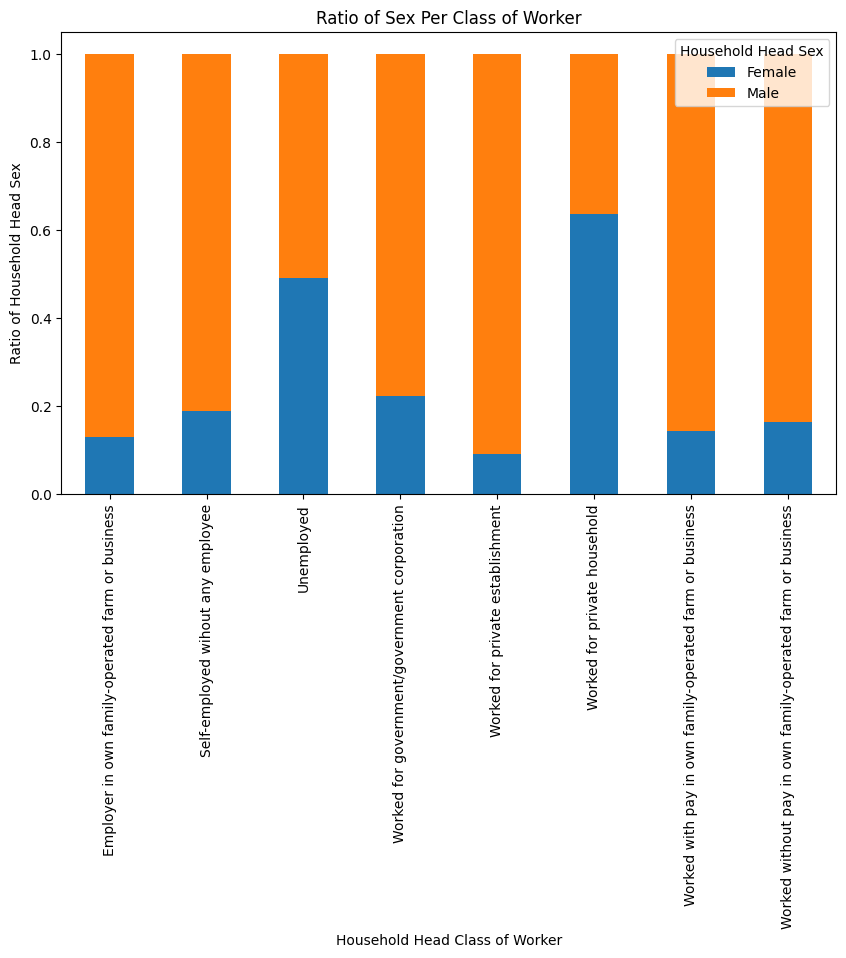

In [25]:
grouped = fie_df.groupby(['Household Head Class of Worker', 'Household Head Sex']).size().unstack(fill_value=0)
sex_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(sex_totals, axis=0)
grouped_ratio

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Household Head Class of Worker')
ax.set_ylabel('Ratio of Household Head Sex')
ax.set_title('Ratio of Sex Per Class of Worker')
plt. legend(title='Household Head Sex', loc='upper right')

plt.show()

### 5. Average Total Household Income Per Region

In [26]:
income_mean = fie_df.groupby('Region').agg({'Total Household Income': ['mean']})
income_mean.sort_values(by=('Total Household Income', 'mean'), ascending=False)

,Total Household Income
,mean
Region,
NCR,420861.861501
IVA - CALABARZON,303360.536040
III - Central Luzon,292965.181650
CAR,269540.484638
XI - Davao Region,238115.891251
I - Ilocos Region,238110.084327
II - Cagayan Valley,236778.221721
VII - Central Visayas,234909.314050


Text(0.5, 1.0, 'Average Total Household Income Per Region')

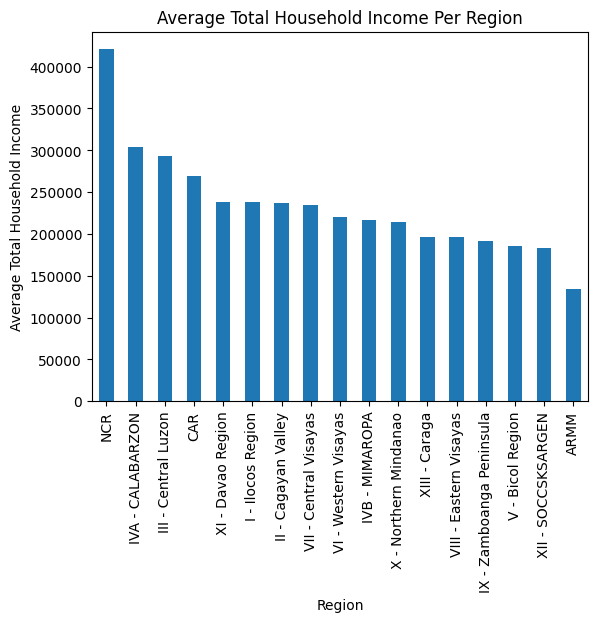

In [27]:
income_mean = income_mean.sort_values(by=('Total Household Income', 'mean'), ascending=False) 
income_mean.plot(kind='bar', legend=None)
plt.xlabel('Region')
plt.ylabel('Average Total Household Income')
plt.title('Average Total Household Income Per Region')

### 6. Household Head Employment Rate Per Region

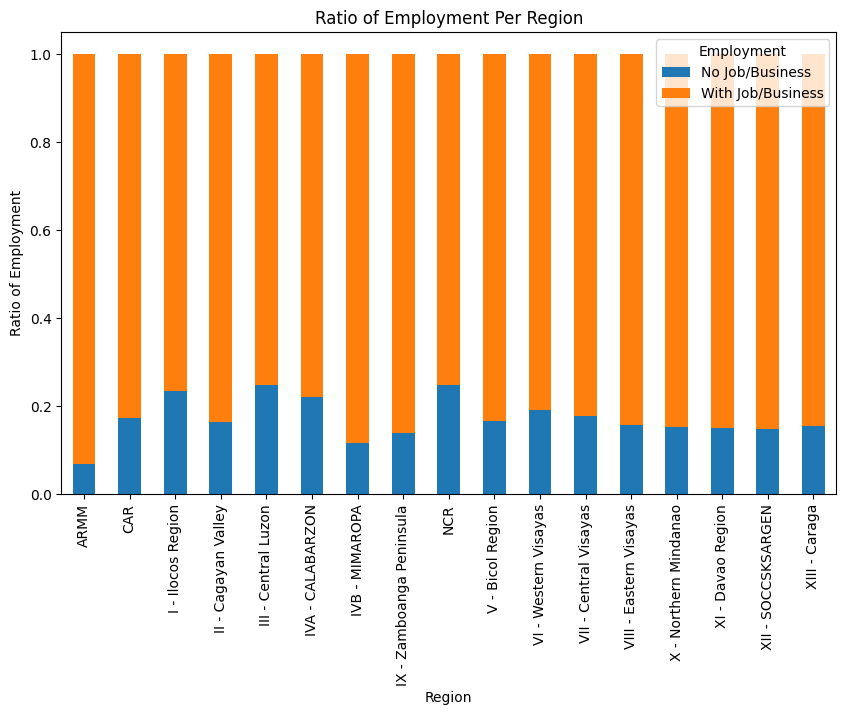

In [28]:
grouped = fie_df.groupby(['Region', 'Household Head Job or Business Indicator']).size().unstack(fill_value=0)
employment_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(employment_totals, axis=0)
grouped_ratio

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Region')
ax.set_ylabel('Ratio of Employment')
ax.set_title('Ratio of Employment Per Region')
plt. legend(title='Employment', loc='upper right')

## EDA Question #2

The second EDA question aims to identify the characteristics of the different income classes.

Specifically, we aim to answer the following questions:
1. What is the distribution of households per income class?
2. What is the average wealth of each income class?
3. What is the proportion of educational attainment of household heads per income class?
4. What is the proportion of main source of income per income class?
5. What is the proportion of class of worker of household heads per income class?
6. What are the occupations of the household heads of the top 5 poorest and richest households?
7. ???

### 1. Distribution of Households Per Income Class

In [29]:
value_counts = fie_df['Income Class'].value_counts()
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
sorted_value_counts = value_counts.reindex(custom_order)
sorted_value_counts

Income Class
Poor                          3282
Low-income                   12299
Lower middle                 13989
Middle                        7077
Upper middle                  3389
Upper middle but not rich     1108
Rich                           400
Name: count, dtype: int64

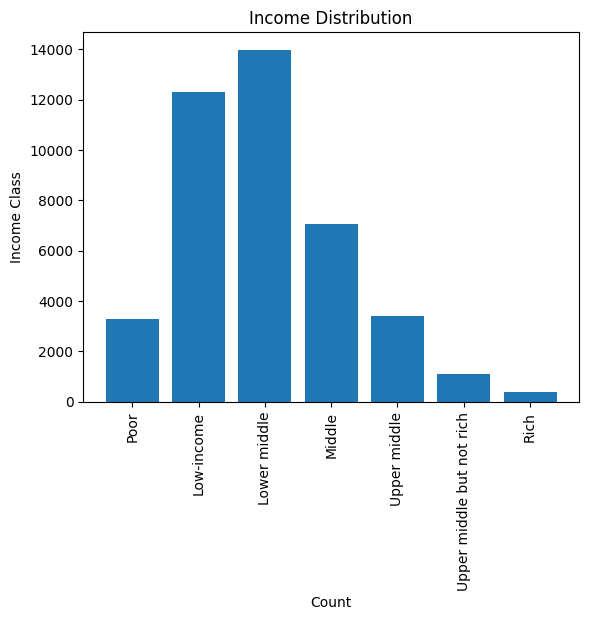

In [30]:
plt.bar(sorted_value_counts.index, sorted_value_counts.values)
plt.xlabel('Count')
plt.ylabel('Income Class')
plt.title('Income Distribution')
plt.xticks(rotation=90)  
plt.show()

### 2. Average Wealth of Each Income Class -  TODO: NOT MEAN!

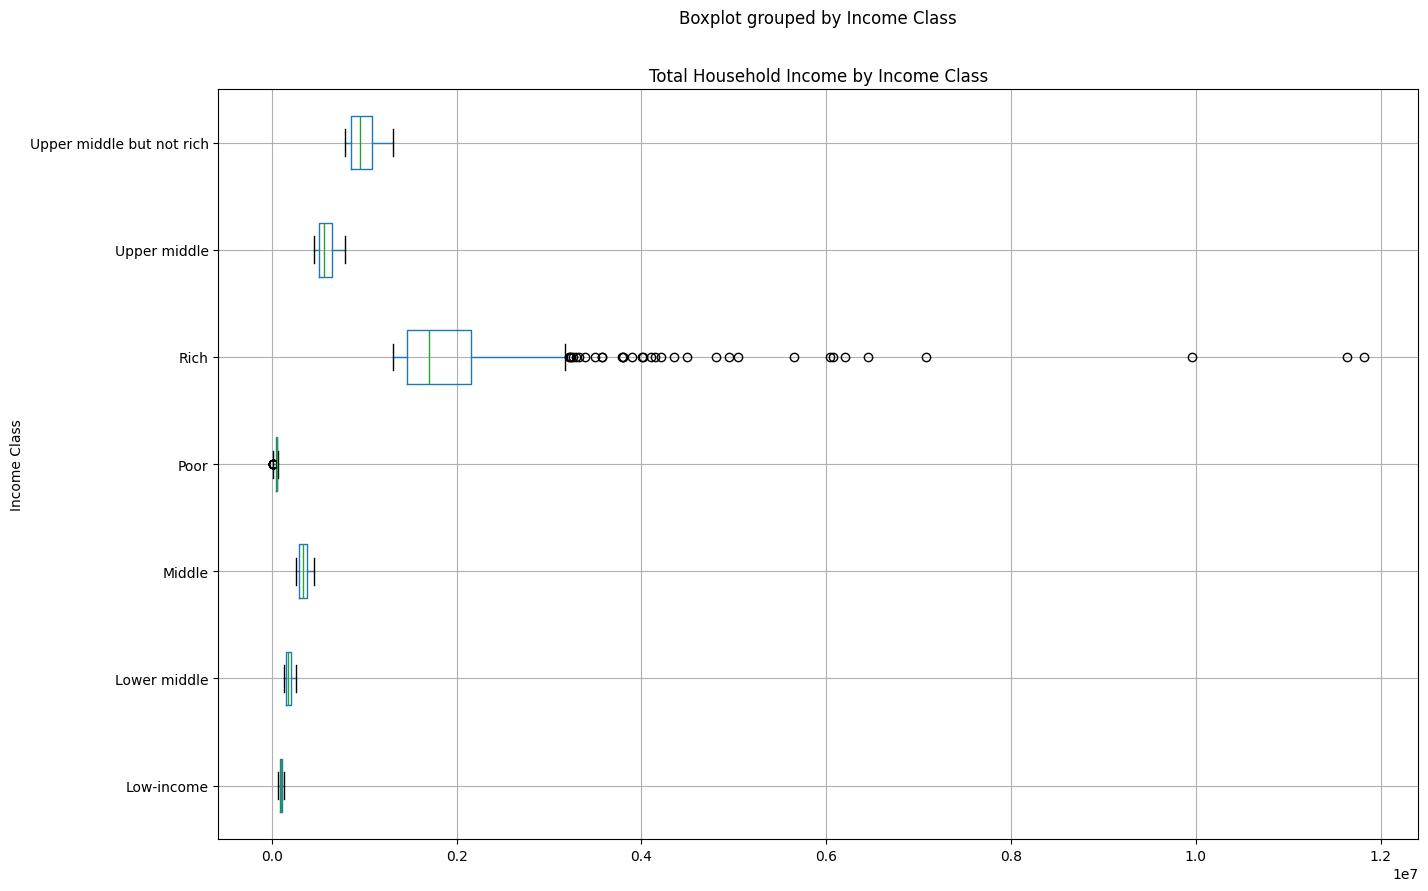

In [47]:
fie_df.boxplot("Total Household Income", by="Income Class", figsize=(15,10), vert=False)
plt.title('Total Household Income by Income Class')
plt.show()

In [35]:
selected_columns = [
    'Total Household Income', 
    'Type of Building/House', 
    'Type of Roof', 
    'Type of Walls', 
    'House Floor Area', 
    'House Age',
    'Number of bedrooms',
    'Tenure Status',
    'Toilet Facilities',
    'Electricity',
    'Main Source of Water Supply',
    'Number of Television',
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Landline/wireless telephones',
    'Number of Cellular phone',
    'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range',
    'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle'
]

grouped = fie_df.groupby('Income Class')
aggregated = {}

for col in selected_columns:
    if np.issubdtype(fie_df[col].dtype, np.number):
        aggregated[col] = 'mean'
    else:
        aggregated[col] = lambda x: x.mode().iloc[0]

result = grouped.agg(aggregated)
result = result.rename(columns={'Total Household Income': 'Mean Total Household Income'})  # Rename the mean column if needed

custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
result = result.reindex(custom_order)

result['Mean Total Household Income']

Income Class
Poor                         4.947250e+04
Low-income                   9.981326e+04
Lower middle                 1.844943e+05
Middle                       3.428993e+05
Upper middle                 5.855226e+05
Upper middle but not rich    9.793642e+05
Rich                         2.043539e+06
Name: Mean Total Household Income, dtype: float64

### 3. Proportion of Household Head Educational Attainment By Income Class

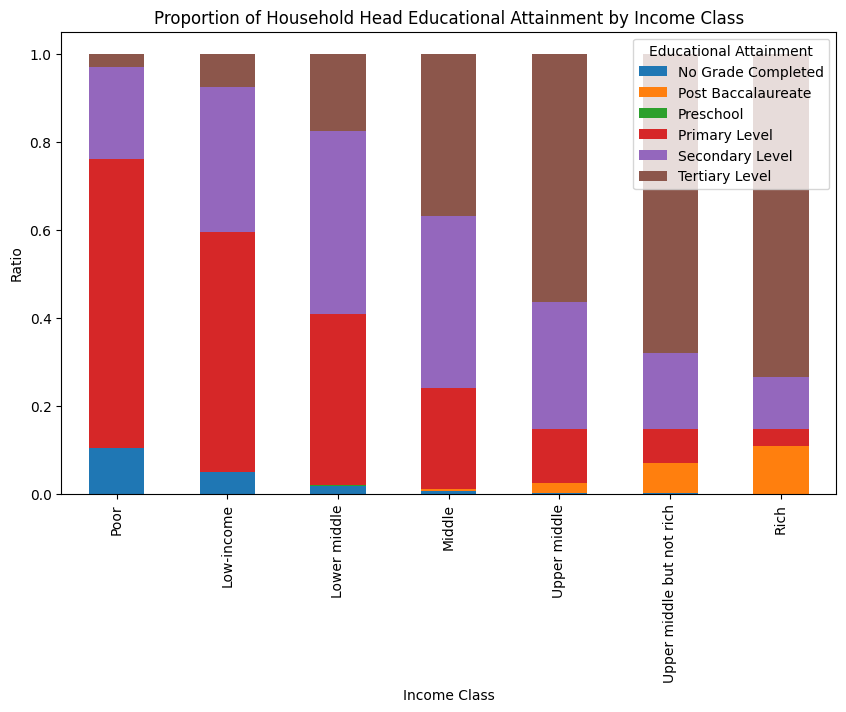

In [44]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Household Head Highest Grade Completed']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
educ_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(educ_totals, axis=0)
ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio')
ax.set_title('Proportion of Household Head Educational Attainment by Income Class')
plt.legend(title='Educational Attainment', loc='upper right')

plt.show()

### 4. Proportion of Main Source of Income By Income Class

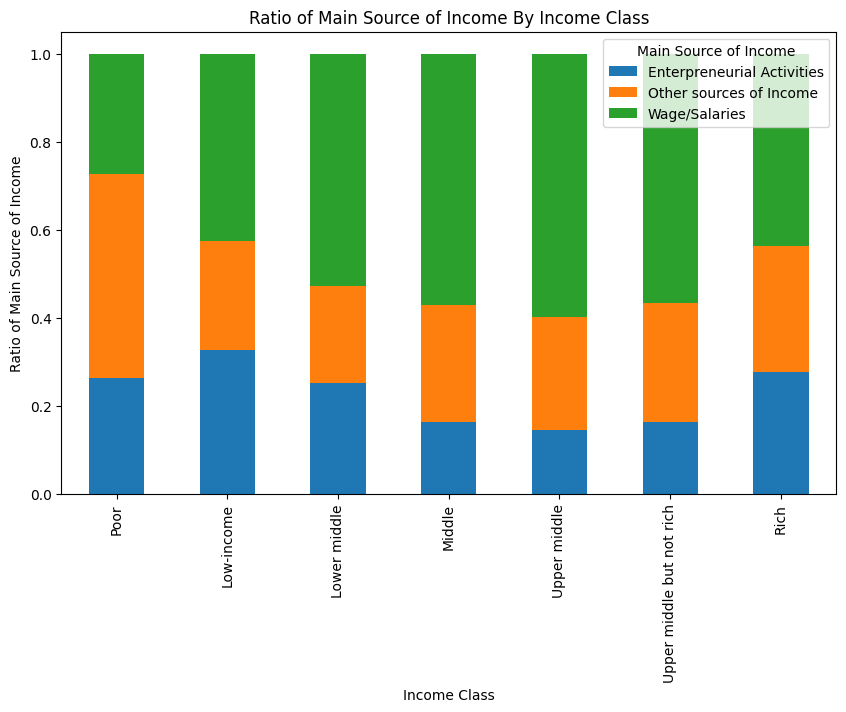

In [41]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Main Source of Income']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
class_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(class_totals, axis=0)

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio of Main Source of Income')
ax.set_title('Proportion of Main Source of Income By Income Class')
plt.legend(title='Main Source of Income', loc='upper right')

plt.show()

### 5. Proportion of Household Head Class of Worker Per Income Class

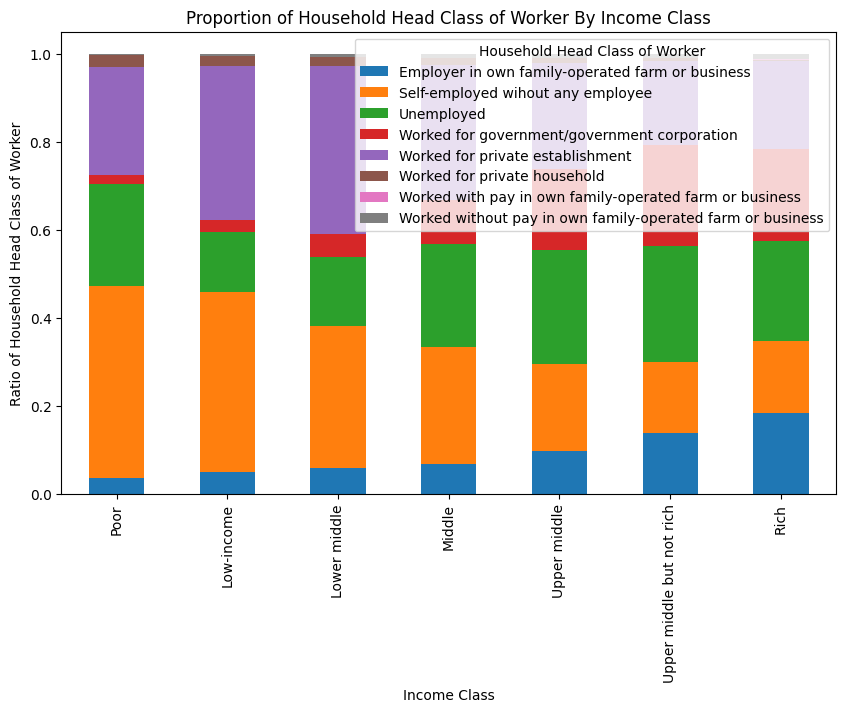

In [48]:
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

grouped = fie_df.groupby(['Income Class', 'Household Head Class of Worker']).size().unstack(fill_value=0)
grouped = grouped.reindex(custom_order)
class_totals = grouped.sum(axis=1)
grouped_ratio = grouped.divide(class_totals, axis=0)

ax = grouped_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Ratio of Household Head Class of Worker')
ax.set_title('Proportion of Household Head Class of Worker By Income Class')
plt.legend(title='Household Head Class of Worker', loc='upper right')

plt.show()

### 6. Household Head Occupations of Top 5 Poorest and Richest Households

In [49]:
top_5_poorest = fie_df.nsmallest(5, 'Total Household Income')

# Get the Top 5 richest households based on 'Household Income'
top_5_richest = fie_df.nlargest(5, 'Total Household Income')

# Extract occupations of household heads for the Top 5 Poorest and Richest households
occupations_poorest = top_5_poorest['Household Head Occupation']
occupations_richest = top_5_richest['Household Head Occupation']

# Display the results
print("Top 5 Poorest Household Head Occupations:")
print(occupations_poorest)

print("\nTop 5 Richest Household Head Occupations:")
print(occupations_richest)

Top 5 Poorest Household Head Occupations:
9474     Farmhands and laborers
22638                Unemployed
31209    Farmhands and laborers
6356                 Unemployed
10200              Corn farmers
Name: Household Head Occupation, dtype: object

Top 5 Richest Household Head Occupations:
2139     General managers/managing proprietors in const...
1238     General managers/managing proprietors in whole...
30865    General managers/managing proprietors in whole...
9382                               Street ambulant vendors
39302    General managers/managing proprietors in whole...
Name: Household Head Occupation, dtype: object


## EDA Question #3

The third EDA question aims to distinguish the expenditure pattern among the different income classes. 

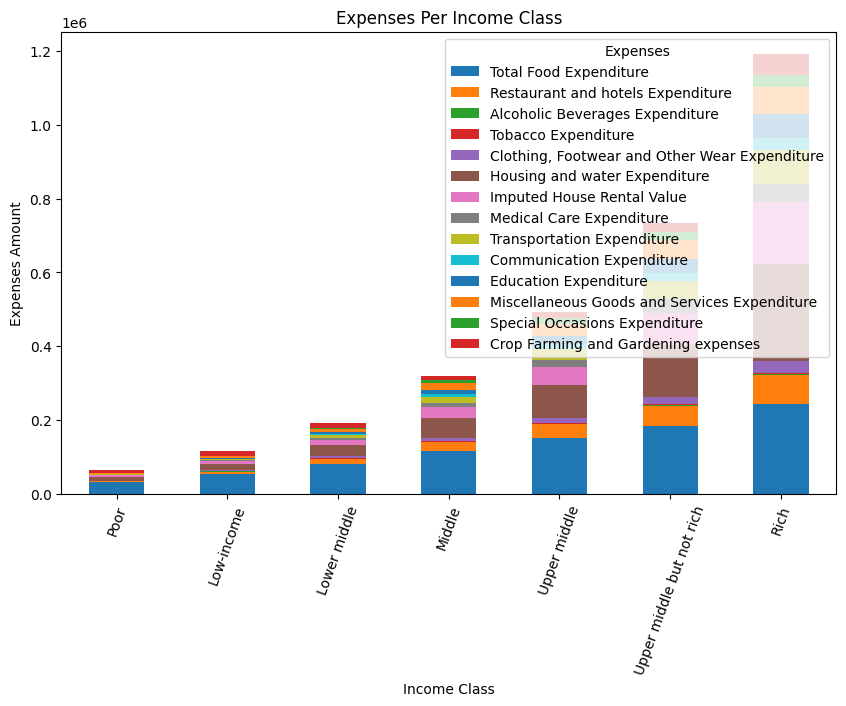

In [61]:
exp = [
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

expense_scatter = fie_df.groupby("Income Class")[exp].mean().round(2).sort_values(by=exp, ascending=False)
custom_order = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]
expense_scatter = expense_scatter.reindex(custom_order)

ax = expense_scatter.plot(kind='bar', rot=70, stacked=True, figsize=(10,6))
ax.set_xlabel('Income Class')
ax.set_ylabel('Expenses Amount')#?????
ax.set_title('Expenses Per Income Class')
plt.legend(title='Expenses', loc='upper right')

plt.show()

# References
Philippine Statistics Authority. (2017). 2015 Family income and expenditure survey. https://library.psa.gov.ph/cgi-bin/koha/opac-detail.pl?biblionumber=15585 

# Feature Selection

## One Hot Encoding of Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
fie_df.head()
fie_df.tail()

In [ ]:
fie_df.dtypes

In [ ]:
ohe = OneHotEncoder()

In [ ]:
categorical_columns = fie_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Income Class']

In [ ]:
feature_array = ohe.fit_transform(fie_df[categorical_columns]).toarray()

In [ ]:
ohe.categories_

In [ ]:
feature_labels = ohe.categories_

In [ ]:
feature_labels = np.array(feature_labels, dtype='object').ravel()
flattened_feature_labels = np.concatenate(feature_labels)

In [ ]:
print(flattened_feature_labels)

In [ ]:
features = pd.DataFrame(feature_array, columns = flattened_feature_labels)

In [ ]:
features.head()

In [ ]:
numerical_columns = fie_df.select_dtypes(include=['int64'])

new_fie_df = pd.concat([features, numerical_columns], axis=1)

## Label Encoding of Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

custom_labels = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

# Fit the label encoder with the custom mapping
label_encoder.fit(custom_labels)

# Create a custom mapping dictionary
custom_mapping = {label: idx for idx, label in enumerate(custom_labels)}

# Transform your data using the custom mapping
new_fie_df['Income Class'] = fie_df['Income Class'].map(custom_mapping)

## Correlation

In [ ]:
corr = new_fie_df.corr()
correlation_threshold = 0.5  # Adjust this threshold as needed

# Calculate the absolute correlation matrix
corr_matrix = new_fie_df.corr().abs()

# Create an upper triangular mask to avoid duplicates and the diagonal
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find the columns (features) to drop based on the threshold
to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] > correlation_threshold)]

# Create a new DataFrame with the highly correlated features removed
df_filtered = new_fie_df.drop(columns=to_drop)

In [ ]:
df_filtered.shape

## Backward Elimination Method

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
X = new_fie_df.iloc[:,:-1]
y = new_fie_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                      k_features=(1, 454),
                                                      forward=False,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='accuracy',
                                                      cv=5).fit(X_train, y_train)

In [ ]:
backward_feature_selector.k_feature_names_

In [ ]:
backward_feature_selector.k_score_

# K-Means

In [ ]:
fie_df.shape

In [ ]:
new_fie_df.shape

In [ ]:
df_filtered.shape

In [ ]:
fie_df['Income Class']

In [ ]:
bins = [0, 10957, 21914, 43828, 76669, 131484, 219140, df_filtered['Total Household Income'].max() + 1]
labels=["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

df_filtered['Income Class'] = pd.cut(df_filtered['Total Household Income'], bins=bins, labels=labels, right=False)
df_filtered['Income Class'] = df_filtered['Income Class'].astype('object')

custom_labels = ["Poor", "Low-income", "Lower middle", "Middle", "Upper middle", "Upper middle but not rich", "Rich"]

# Create a custom mapping dictionary
custom_mapping = {label: idx for idx, label in enumerate(custom_labels)}

# Transform your data using the custom mapping
df_filtered['Income Class'] = df_filtered['Income Class'].map(custom_mapping)

In [ ]:
fie_df_num = fie_df.select_dtypes(['int64'])
new_fie_df_num = new_fie_df.select_dtypes(['float64', 'int64'])
df_filtered_num = df_filtered.select_dtypes(['float64', 'int64'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
fie_kmeans = KMeans(7, init='random')
fie_kmeans = fie_kmeans.fit(fie_df_num)
fie_df['Predicted Class'] = pd.Series(fie_kmeans.predict(fie_df_num))
fie_df['Predicted Class'].value_counts()

In [ ]:
new_fie_kmeans = KMeans(7, init='random')
new_fie_kmeans = new_fie_kmeans.fit(new_fie_df_num)
new_fie_df['Predicted Class'] = pd.Series(new_fie_kmeans.predict(new_fie_df_num))
new_fie_df['Predicted Class'].value_counts()

In [ ]:
df_filtered_kmeans = KMeans(7, init='random')
df_filtered_kmeans = df_filtered_kmeans.fit(df_filtered_num)
df_filtered['Predicted Class'] = pd.Series(df_filtered_kmeans.predict(df_filtered_num))
df_filtered['Predicted Class'].value_counts()

In [ ]:
# tp_fie_df = fie_df[['Income Class', 'Predicted Class']]
# tp_new_fie_df = new_fie_df[['Income Class', 'Predicted Class']]
tp_filtered_df = df_filtered[['Income Class', 'Predicted Class']]

# tp_fie_df['Bracket and Class'] = tp_fie_df[['Income Class', 'Predicted Class']].apply(tuple, axis=1)
# tp_new_fie_df['Bracket and Class'] = tp_new_fie_df[['Income Class', 'Predicted Class']].apply(tuple, axis=1)
tp_filtered_df['Bracket and Class'] = tp_filtered_df[['Income Class', 'Predicted Class']].apply(tuple, axis=1)

In [ ]:
fie_counts = tp_fie_df['Bracket and Class'].value_counts()
plt.figure(figsize=(10,6))
fie_counts.plot(kind='bar', rot=90)
plt.xlabel('(Income Class, Predicted Class)')
plt.ylabel('Count')
plt.title('Income Class and Predicted Class - Original Data')
plt.show()

In [ ]:
new_fie_counts = tp_new_fie_df['Bracket and Class'].value_counts()
plt.figure(figsize=(10,6))
new_fie_counts.plot(kind='bar', rot=90)
plt.xlabel('(Income Class, Predicted Class)')
plt.ylabel('Count')
plt.title('Income Class and Predicted Class - One Hot Encoding Applied ')
plt.show()

In [ ]:
filtered_counts = tp_filtered_df['Bracket and Class'].value_counts()
plt.figure(figsize=(10,6))
filtered_counts.plot(kind='bar', rot=90)
plt.xlabel('(Income Class, Predicted Class)')
plt.ylabel('Count')
plt.title('Income Class and Predicted Class - One Hot Encoding and Correlation Selection Applied ')
plt.show()

# Testing Stuff

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
test_fie_df = new_fie_df

In [ ]:
# km = KMeans(6, init='random')
# km = km.fit(test_fie_df)
# test_fie_df['Predicted Class'] = pd.Series(km.predict(test_fie_df))
# test_fie_df['Predicted Class'].value_counts()

vars_fie = test_fie_df.groupby('Predicted Class').mean().var(axis=0)
print(test_fie_df.shape)

ALPHA = 1e-5
num_dropped_cols = 1
dropped_cols = []

while dropped_cols != 0:
  km = KMeans(6, init='random')
  km = km.fit(test_fie_df)
  test_fie_df['Predicted Class'] = pd.Series(km.predict(test_fie_df))
  test_fie_df['Predicted Class'].value_counts()

  vars_fie = test_fie_df.groupby('Predicted Class').mean().var(axis=0)

  # ERROR: vars_fie has multiple indices named "Others"
  # Caused by original columns have "Others" as one of its unique values
  # that when it's one-hot encoded, it creates multiple columns named
  # "Others" as well, affecting column dropping for this algorithm
  for ind in vars_fie.index:
    if vars_fie[ind] < ALPHA:
      dropped_cols.append(ind)

  num_dropped_cols = len(dropped_cols)
  test_fie_df = test_fie_df.drop(labels=dropped_cols, axis=1)

print(test_fie_df.shape)

In [ ]:
km = KMeans(6, init='random')
km = km.fit(test_fie_df)
test_fie_df['Predicted Class'] = pd.Series(km.predict(test_fie_df))
test_fie_df['Predicted Class'].value_counts()

vars_fie = test_fie_df.groupby('Predicted Class').mean().var(axis=0)

In [ ]:
test_vars_fie = vars_fie

In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
test_vars_fie.to_csv('drive/My Drive/vars_fie.csv')

In [ ]:
from google.colab import files
files.download("vars_fie.csv")

In [ ]:
new_fie_df['Income Class'].value_counts()

In [ ]:
km = KMeans(6, init='random')
km = km.fit(test_fie_df)
test_fie_df['Predicted Class'] = pd.Series(km.predict(test_fie_df))
test_fie_df['Predicted Class'].value_counts()

vars_fie = test_fie_df.groupby('Predicted Class').mean().var(axis=0)

for ind in vars_fie.index:
  if vars_fie[ind] < ALPHA:
    dropped_cols.append(ind)

num_dropped_cols = len(dropped_cols)
test_fie_df = test_fie_df.drop(labels=dropped_cols, axis=1)

print(test_fie_df.shape)

In [ ]:
for ind in vars_fie.index:
  print(type(vars_fie[ind]))